In [7]:
# 计算1999年全国31个省的人均消费水平
from sklearn.cluster import KMeans
import numpy as np

def loadData(filePath):
    fr = open(filePath,"r+",encoding="utf-8")
    lines = fr.readlines()
    retData = []
    retCityName = []
    for line in lines:
        items = line.strip().split(",")
        retCityName.append(items[0])
        retData.append([float(items[i]) for i in range(1,len(items))])
    for i in range(1,len(items)):
        return retData,retCityName
    


data,cityName = loadData("city.txt")
km = KMeans(n_clusters=3)
label = km.fit_predict(data)
expenses = np.sum(km.cluster_centers_,axis=1)
CityCluster = [[],[],[]]
for i in range(len(cityName)):
    CityCluster[label[i]].append(cityName[i])

for i in range(len(CityCluster)):
    print(CityCluster[i])

['天津', '江苏', '浙江', '福建', '湖南', '广西', '海南', '重庆', '四川', '云南', '西藏']
['河北', '山西', '内蒙古', '辽宁', '吉林', '黑龙江', '安徽', '江西', '山东', '河南', '湖北', '贵州', '陕西', '甘肃', '青海', '宁夏', '新疆']
['北京', '上海', '广东']


In [46]:
# 学生上网分析
import numpy as np
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pylab as  plt

mac2id = dict()
inlinetimes = []
f = open("TestData.txt",encoding="utf-8")
for line in f:
    mac = line.split(",")[2]
    onlinetime = int(line.split(",")[6])
    starttime = int(line.split(",")[4].split(" ")[1].split(":")[0])
    if mac not in mac2id:
        mac2id[mac] = len(onlinetimes)
        inlinetimes.append((starttime,onlinetime))
    else:
        inlinetimes[mac2id[mac]] = [(starttime,onlinetime)]


real_X = np.array(inlinetimes).reshape((-1,2))
X = np.log(1 + real_X[:,1:])
db = skc.DBSCAN(eps=0.14,min_samples=10).fit(X)
labels = db.labels_
print(labels)
raito = len(labels[labels[:] == -1]) / len(labels)
print(raito)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
for i in range(n_clusters_):
    print("Clister",i,":")
    count = len(X[labels == i])
    mean = np.mean(real_X[labels == i][:,1])
    std = np.std(real_X[labels == i][:,1])
    print("\t number if sample:",count)
    print("\t mean of sample:",format(mean,".1f"))
    print("\t std of sample:",format(std,".1f"))

[ 0  1  0  4  1  2  0  2  0  3 -1  0 -1 -1  0  3  1  0  3  2  2  1  2  0
  1  1 -1 -1  0  0  0  0  1  0 -1  0  0  0  2  0  1  0 -1 -1  0  0  0  3
  2  0 -1  1  0  1  0  0 -1  2  0  0  0  1  3  3  0  2  0 -1  3  0  0  2
  0  0  0  2  1 -1  0  0  0  0  0  0  1 -1  0  3  1  0  1  1  0  1  0  1
  0  0 -1  1  1  0  0  2  0  0  0  2  2  0  0  0 -1  0  0  4  0  1  2 -1
  0  1  0  2  0 -1 -1 -1  0  1  1  3 -1  0  1  0  2  0  0  2  1  1  0  0
  0  0  4 -1  0  0  0  0  2  0  0  0  0 -1  2  0  0  0  0  4  0  0 -1  0
  2  0  0 -1  0  1  4  0  0 -1  1  1  0  0  2  0  0  3 -1 -1 -1  1  0  0
  2  1  0 -1 -1  3  2  2  0  0  3  0  1  0  0  0  3  2  0 -1  0  1 -1 -1
  0  2  2  1  4  0  0  1  0  2  0  0  0  0  1  1  0  0  1  0  4 -1 -1  0
  0  0 -1 -1  1 -1  4 -1  0  2  2 -1  2  1  2 -1  0 -1  0  2  2  1 -1  0
  1  2 -1 -1  1 -1  2 -1 -1  1  4  2  3  1  0  4  0  0  4  2  4  0  0  2
 -1]
0.1695501730103806
5
Clister 0 :
	 number if sample: 128
	 mean of sample: 5864.3
	 std of sample: 3498.1
Clister 1 :
	

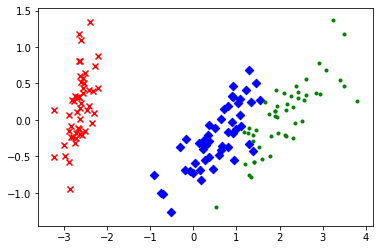

In [2]:
# 降维实现 鸢尾花  PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()

y = data.target
X = data.data
pca = PCA(n_components=2)

reduced_X = pca.fit_transform(X)


red_x,red_y = [],[]
blue_x, blue_y = [],[]
green_x,green_y = [],[]


for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

        
        
plt.scatter(red_x,red_y,c="r",marker="x")
plt.scatter(blue_x,blue_y,c="b",marker="D")
plt.scatter(green_x,green_y,c="g",marker=".")
plt.show()



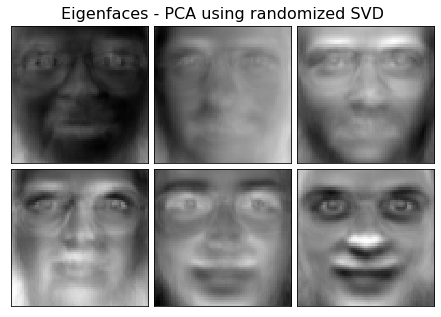

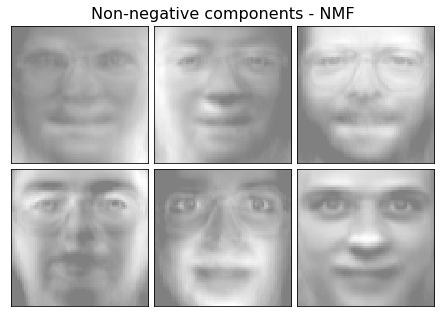

In [8]:
# NMF来人脸识别
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState


n_row,n_col = 2,3
n_components = n_row * n_col

image_shape = (64,64)

dataset = fetch_olivetti_faces(shuffle=True,random_state=RandomState(0))

faces = dataset.data

def plot_gallery(title,images,n_col=n_col,n_row=n_row):
    plt.figure(figsize=(2. * n_col,2.26 * n_row))
    plt.suptitle(title,size=16)
    
    for i,comp in enumerate(images):
        plt.subplot(n_row,n_col,i+1)
        vmax = max(comp.max(),-comp.min())
        
        plt.imshow(comp.reshape(image_shape),cmap=plt.cm.gray,interpolation="nearest",vmin=-vmax,vmax=vmax)
        
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01,0.05,0.99,0.93,0.04,0.)

estimators = [
    ('Eigenfaces - PCA using randomized SVD',decomposition.PCA(n_components=6,whiten=True)),
    ("Non-negative components - NMF",decomposition.NMF(n_components=6,init="nndsvda",tol=5e-3))
    
]
for name,estimator in estimators:
    estimator.fit(faces)
    components_ = estimator.components_
    plot_gallery(name,components_[:n_components])
plt.show()

In [9]:
# 图片分割
import numpy as np
import PIL.Image as image
from sklearn.cluster import KMeans

def loadData(filepath):
    f = open(filepath,"rb")
    data = []
    img = image.open(f)
    m,n = img.size
    for i in range(m):
        for j in range(n):
            x,y,z = img.getpixel((i,j))
            data.append([x/256.0,y/256.0,z/256.0])
    f.close()
    return np.mat(data),m,n
imgData,row,col = loadData("bull.jpg")
km = KMeans(n_clusters=3)
label = km.fit_predict(imgData)
label = label.reshape([row,col])

pic_new = image.new("L",(row,col))
for i in range(row):
    for j in range(col):
        pic_new.putpixel((i,j),int(256 / (label[i][j] + 1)))
pic_new.save("result.jpg","JPEG")